In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from matplotlib import patches

In [2]:
top_left = []
bottom_right = []

def line_select_callback(clk, rls):
    print(clk.xdata, clk.ydata)
    global top_left
    global bottom_right
    top_left = (int(clk.xdata), int(clk.ydata))
    bottom_right = (int(rls.xdata), int(rls.ydata))


def onkeypress(event):
    global top_left
    global bottom_right
    global img
    if event.key == 'q':
        print('final bbox', top_left, bottom_right)
        plt.close()


def toggle_selector(event):
    toggle_selector.RS.set_active(True)

In [257]:
video_name = 'video3.avi'
params = {
    "draw_plots": 1,
    "hist_bin": 16,
    "alpha": 0,
    "sigma_observe": 0.01,
    "model": 0,
    "num_particles": 30,
    "sigma_position": 15,
    "sigma_velocity": 1,
    "initial_velocity": (1, 10)
}

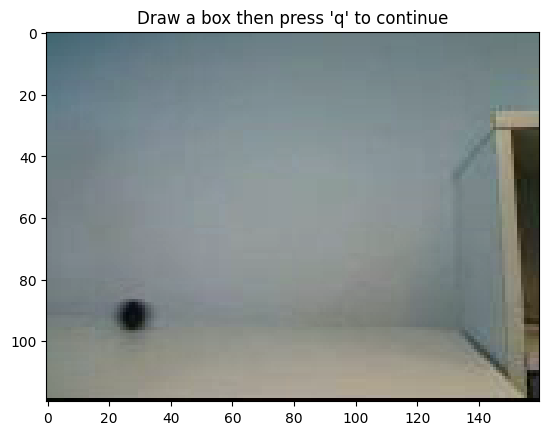

In [255]:
# Choose video
if video_name == "video1.avi":
    first_frame = 10
    last_frame = 42
elif video_name == "video2.avi":
    first_frame = 3
    last_frame = 40
elif video_name == "video3.avi":
    first_frame = 1
    last_frame = 60

# Change this to where your data is
data_dir = './ex6_data/'
video_path = os.path.join(data_dir, video_name)

vidcap = cv2.VideoCapture(video_path)
vidcap.set(1, first_frame)
ret, first_image = vidcap.read()

fig, ax = plt.subplots(1)
image = first_image
frame_height = first_image.shape[0]
frame_width = first_image.shape[1]

first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)
ax.imshow(first_image)

toggle_selector.RS = RectangleSelector(
        ax, line_select_callback,
        useblit=True,
        button=[1], minspanx=5, minspany=5,
        spancoords='pixels', interactive=True
    )
bbox = plt.connect('key_press_event', toggle_selector)
key = plt.connect('key_press_event', onkeypress)
plt.title("Draw a box then press 'q' to continue")
plt.show()

In [256]:
# selected from the interactive window
# notebook does not have support

top_left = (22, 86) 
bottom_right = (34, 97)

In [6]:
bbox_width = bottom_right[0] - top_left[0]
bbox_height = bottom_right[1] - top_left[1]

In [7]:
print(bbox_width)
print(bbox_height)

12
11


In [8]:
print(first_image.shape)
print(first_image.max())
print(first_image.min())

(120, 160, 3)
180
0


In [9]:
first_image

array([[[ 65, 102, 112],
        [ 65, 102, 112],
        [ 65, 102, 112],
        ...,
        [100, 123, 122],
        [100, 123, 122],
        [100, 123, 122]],

       [[ 65, 102, 112],
        [ 65, 102, 112],
        [ 65, 102, 112],
        ...,
        [102, 125, 124],
        [102, 125, 124],
        [102, 125, 124]],

       [[ 66, 103, 113],
        [ 66, 103, 113],
        [ 67, 104, 114],
        ...,
        [103, 124, 124],
        [103, 124, 124],
        [103, 124, 124]],

       ...,

       [[126, 132, 121],
        [126, 132, 121],
        [127, 134, 122],
        ...,
        [ 25,  24,  13],
        [ 52,  52,  54],
        [ 43,  43,  45]],

       [[126, 130, 120],
        [126, 130, 120],
        [128, 132, 121],
        ...,
        [ 25,  25,  11],
        [ 45,  45,  45],
        [ 43,  43,  43]],

       [[  0,   4,   0],
        [  1,   5,   0],
        [  2,   6,   0],
        ...,
        [  4,   4,   0],
        [  5,   5,   5],
        [  7,   7,   7]]

In [10]:
hist, edges = np.histogramdd((first_image[:,:,0].ravel(), first_image[:,:,1].ravel(), first_image[:,:,2].ravel()), bins=(256, 256, 256), range=((0, 255), (0, 255), (0, 255)), density=True)

In [11]:
hist.shape

(256, 256, 256)

In [12]:
hist

array([[[2.10793938e-04, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.05396969e-04, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.26984845e-05, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.05396969e-04, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [13]:
first_image[:,:,0].ravel().shape

(19200,)

In [14]:
first_image[:,:,0].shape

(120, 160)

In [15]:
hist.shape

(256, 256, 256)

In [16]:
bin_edges

NameError: name 'bin_edges' is not defined

In [ ]:
bin_edges.shape

In [17]:
first_image[:,:,0].shape

(120, 160)

In [18]:
color_histogram(top_left[0], top_left[1], bottom_right[0], bottom_right[1],
                first_image, params["hist_bin"])

NameError: name 'color_histogram' is not defined

In [19]:
x0 = top_left[0]
y0 = top_left[1]
x1 = bottom_right[0]
y1 = bottom_right[1]
# (x0,y0) top, (x1,y1) bottom
img = first_image
hist_bin = params["hist_bin"]

In [251]:
def color_histogram(x0, y0, x1, y1, img, hist_bin=256):
    img_rgb = img[y0:y1, x0:x1] # select the object
    img_rgb = (img_rgb[:,:,0].flatten(), img_rgb[:,:,1].flatten(), img_rgb[:,:,2].flatten()) # flatten rgb
    # calculate normalized histogram
    hist, edges = np.histogramdd(img_rgb, bins=(hist_bin, hist_bin, hist_bin), range=((0, 255), (0, 255), (0, 255)), density=False)
    hist = hist/hist.sum()
    return hist

In [250]:
(color_histogram(x0, y0, x1, y1, img, hist_bin)/color_histogram(x0, y0, x1, y1, img, hist_bin).sum()).sum()

1.0

In [253]:
color_histogram(x0, y0, x1, y1, img, hist_bin)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [22]:
color_histogram(0, 0, x1, y1, img, hist_bin).sum()

3298.0

In [23]:
hist = color_histogram(x0, y0, x1, y1, img, hist_bin)

In [24]:
hist.shape

(16, 16, 16)

In [25]:
hist.sum()

132.0

In [26]:
hist

array([[[ 3.,  9.,  0., ...,  0.,  0.,  0.],
        [ 4., 11.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  8.,  1., ...,  0.,  0.,  0.],
        [ 0.,  3.,  3., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  5., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [27]:
img[x0:y0, x1:y1].shape

(64, 63, 3)

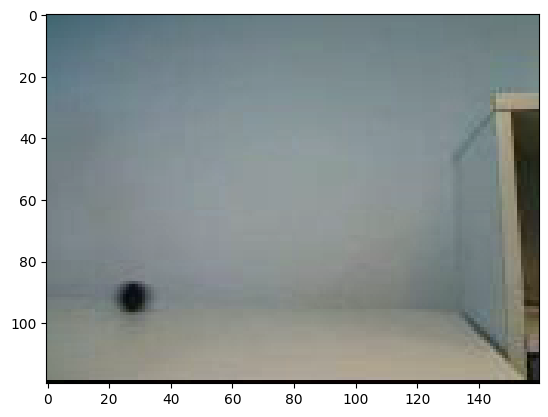

In [28]:
plt.imshow(img)

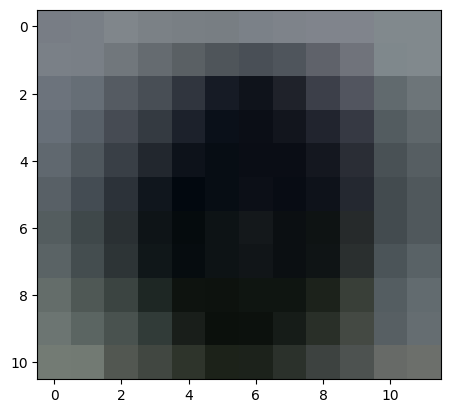

In [29]:
plt.imshow(img[y0:y1, x0:x1])

In [30]:
print(x0,y0)
print(x1,y1)

22 86
34 97


In [31]:
state_length = 2
if(params["model"] == 1):
    state_length = 4

In [32]:
# a priori mean state
mean_state_a_priori = np.zeros([last_frame - first_frame + 1, state_length])
mean_state_a_posteriori = np.zeros([last_frame - first_frame + 1, state_length])
mean_state_a_priori.shape

(60, 2)

In [33]:
print(top_left)
print(bottom_right)

(22, 86)
(34, 97)


In [34]:
# bounding box centre
mean_state_a_priori[0, 0:2] = [(top_left[0] + bottom_right[0])/2., (top_left[1] + bottom_right[1])/2.]

In [35]:
mean_state_a_priori

array([[28. , 91.5],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,

In [36]:
mean_state_a_priori.shape

(60, 2)

In [37]:
if params["model"] == 1:
    # use initial velocity
    mean_state_a_priori[0, 2:4] = params["initial_velocity"]


In [38]:
# Initialize Particles
# const velocity kisimlarini sabitliyor => particle daki xprime, yprime => sabit
particles = np.tile(mean_state_a_priori[0], (params["num_particles"], 1))

# ilk dagilim butun particle lar esit weight e sahip
# uniform distribution
particles_w = np.ones([params["num_particles"], 1]) * 1./params["num_particles"]

In [39]:
mean_state_a_priori[0].shape

(2,)

In [40]:
particles

array([[28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5]])

In [41]:
particles.shape

(30, 2)

In [42]:
particles_w

array([[0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333]])

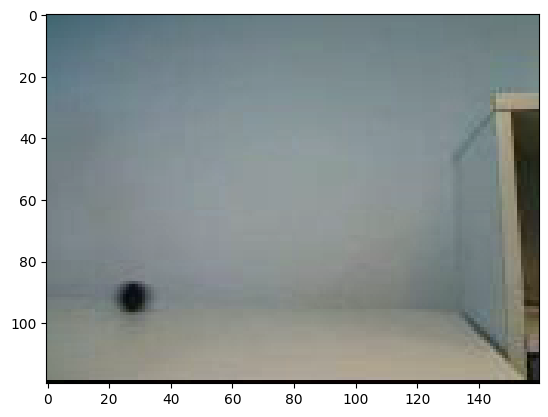

In [43]:
fig, ax = plt.subplots(1)
im = ax.imshow(first_image)
plt.ion()

In [44]:
print(frame_height, frame_width)
# frame_height => y
# frame_width  => x


120 160


In [45]:
def propagate(particles, frame_height, frame_width, params):

    N = params["num_particles"]
    
    if params["model"] == 1: # constant velo
        # calculate transformation
        A = np.identity(4)
        A[0, 2] = 1
        A[1, 3] = 1
        # noise calculation: assumption 0 centered => makes sense since we add on top of the center
        # calculate noise for position
        std_pos = params["sigma_position"]
        noise_pos = np.random.normal(0, std_pos, (N,2))
        # calculate noise for velocity
        std_velo = params["sigma_velocity"]
        noise_velo = np.random.normal(0, std_velo, (N,2))
        # cat noise
        noise = np.concatenate((noise_pos, noise_velo), axis=0)
    else: # no velo / no motion
        A = np.identity(2)
        
        std_pos = params["sigma_position"]
        noise_pos = np.random.normal(0, std_pos, (N,2))
        noise = noise_pos
        
    # apply transformation
    s_t = np.matmul(A, particles.T).T + noise
    
    # clamp state boundaries after the transformation
    s_t = np.clip(s_t, a_min=[0,0], a_max=[frame_width, frame_height])
    
    return s_t # new particles propagated


In [46]:
new_particles = propagate(particles, frame_height, frame_width, params)

In [47]:
new_particles

array([[ 29.62848414,  84.83913613],
       [ 52.03611089,  75.2366416 ],
       [ 39.61681311,  82.34696806],
       [  3.52204498,  82.56700383],
       [ 19.80446132,  72.39371772],
       [ 35.5564742 ,  80.48416741],
       [ 28.10915723,  94.87152436],
       [ 28.95374807,  83.56208076],
       [ 38.43867753,  81.49423961],
       [ 17.9019431 ,  92.96696815],
       [  6.08715562, 100.84521479],
       [ 19.44725984,  96.80784879],
       [ 21.76450396,  75.38698938],
       [ 22.80227631, 102.95433687],
       [ 20.12029356, 104.69409306],
       [ 32.29402277,  96.1888897 ],
       [ 25.36673629, 107.38973228],
       [  6.17828188, 101.27630406],
       [ 24.80712091, 114.52565904],
       [ 27.60529823, 107.29934127],
       [ 17.32047671,  71.07829718],
       [ 31.67154084, 110.28737205],
       [  2.38144095,  88.15822017],
       [ 36.75690022, 102.5462548 ],
       [ 22.84857672, 105.28520425],
       [ 39.12702796, 107.80618089],
       [ 38.49454074,  88.23594376],
 

In [209]:
def estimate(particles, particles_w):
    # assuming weights are normalized and of shape (N,1) for broadcasting
    w = particles_w.reshape(-1,1)
    e_st = np.sum(particles*w, axis=0)
    return e_st

In [49]:
print(params["hist_bin"])
print(params["sigma_observe"])

16
0.1


In [50]:
hist.shape

(16, 16, 16)

In [131]:
print(top_left)
print(bottom_right)
mean_state_a_priori[0]

(22, 86)
(34, 97)


array([28. , 91.5])

In [52]:
print(bbox_width)
print(bbox_height)


12
11


In [53]:
def chi2_cost(hist_x, hist):
    dist = np.sum( ((hist_x - hist) * (hist_x - hist)) / (hist_x + hist + 1e-8) )
    return dist

In [54]:
ret, frame = vidcap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)



In [55]:
sig_obsv = params["sigma_observe"]
particles = new_particles

In [56]:
particles

array([[ 29.62848414,  84.83913613],
       [ 52.03611089,  75.2366416 ],
       [ 39.61681311,  82.34696806],
       [  3.52204498,  82.56700383],
       [ 19.80446132,  72.39371772],
       [ 35.5564742 ,  80.48416741],
       [ 28.10915723,  94.87152436],
       [ 28.95374807,  83.56208076],
       [ 38.43867753,  81.49423961],
       [ 17.9019431 ,  92.96696815],
       [  6.08715562, 100.84521479],
       [ 19.44725984,  96.80784879],
       [ 21.76450396,  75.38698938],
       [ 22.80227631, 102.95433687],
       [ 20.12029356, 104.69409306],
       [ 32.29402277,  96.1888897 ],
       [ 25.36673629, 107.38973228],
       [  6.17828188, 101.27630406],
       [ 24.80712091, 114.52565904],
       [ 27.60529823, 107.29934127],
       [ 17.32047671,  71.07829718],
       [ 31.67154084, 110.28737205],
       [  2.38144095,  88.15822017],
       [ 36.75690022, 102.5462548 ],
       [ 22.84857672, 105.28520425],
       [ 39.12702796, 107.80618089],
       [ 38.49454074,  88.23594376],
 

In [57]:
particles

array([[ 29.62848414,  84.83913613],
       [ 52.03611089,  75.2366416 ],
       [ 39.61681311,  82.34696806],
       [  3.52204498,  82.56700383],
       [ 19.80446132,  72.39371772],
       [ 35.5564742 ,  80.48416741],
       [ 28.10915723,  94.87152436],
       [ 28.95374807,  83.56208076],
       [ 38.43867753,  81.49423961],
       [ 17.9019431 ,  92.96696815],
       [  6.08715562, 100.84521479],
       [ 19.44725984,  96.80784879],
       [ 21.76450396,  75.38698938],
       [ 22.80227631, 102.95433687],
       [ 20.12029356, 104.69409306],
       [ 32.29402277,  96.1888897 ],
       [ 25.36673629, 107.38973228],
       [  6.17828188, 101.27630406],
       [ 24.80712091, 114.52565904],
       [ 27.60529823, 107.29934127],
       [ 17.32047671,  71.07829718],
       [ 31.67154084, 110.28737205],
       [  2.38144095,  88.15822017],
       [ 36.75690022, 102.5462548 ],
       [ 22.84857672, 105.28520425],
       [ 39.12702796, 107.80618089],
       [ 38.49454074,  88.23594376],
 

In [58]:
print(frame.shape)

(120, 160, 3)


In [224]:
def observe(particles, frame, bbox_height, bbox_width, hist_bin, hist, sig_obsv):

    # loop try-1: low memory design, not vectorized
    weights = []
    hist_list = []
    xi_list = []
    h,w,_ = frame.shape
    
    for p in particles:
        x,y = p
        x0, y0 = int(x - bbox_width/2), int(y - bbox_height/2)
        x1, y1 = int(x + bbox_width/2), int(y + bbox_height/2)
        
        # TODO: Clamp coordinates => frame.shape
        x0 = np.clip(x0, 0, w)
        x1 = np.clip(x1, 0, w)
        y0 = np.clip(y0, 0, h)
        y1 = np.clip(y1, 0, h)
        
        # print(x0,y0)
        # print(x1,y1)
    
        
        # calculate histogram for the bbox centered at x,y
        hist_sn = color_histogram(x0, y0, x1, y1, frame, hist_bin)
        hist_list.append(hist_sn)
        
        # chi-squared distance
        x2_dist = chi2_cost(hist_sn, hist)
        # print(x2_dist)
        # Problem xi2 distance of each is very close
        xi_list.append(x2_dist)
    
    xi_arr = np.array(xi_list)
    b = xi_arr.max()
    # max shift => numerical stability => avoid nans
    # # calculate gaussian weight
    w = np.exp(-(xi_arr-b)/(2*(sig_obsv**2)))
    w =  w/w.sum()
    
    return w


# TODO: also try => vectorized which is faster => how much memory +
# TOCHECK: does weights increase as gets close to object location
# TOCHECK: do we get nans at any point? can we get out of location, not valid locations?


In [144]:
particles_w = observe(particles, frame, bbox_height, bbox_width, hist_bin, hist, sig_obsv)

In [147]:
estimate(particles, particles_w.reshape(-1,1))

array([25.66329301, 91.79701306])

In [202]:
def resample(particles, particles_w):
    N = particles.shape[0]
    samples = np.random.choice(len(particles_w), N, p=particles_w)
    new_particles = particles[samples]
    new_particles_w = particles_w[samples]
    new_particles_w = new_particles_w/new_particles_w.sum()
    return new_particles, new_particles_w

In [203]:
new_particles, new_particles_w = resample(particles, particles_w)

In [204]:
new_particles_w

array([0.0336523 , 0.03377844, 0.03376582, 0.03325166, 0.03246465,
       0.0336775 , 0.0336523 , 0.03341386, 0.03341386, 0.03372794,
       0.03246465, 0.03376581, 0.03377842, 0.03341384, 0.03341384,
       0.03251333, 0.03246465, 0.03376581, 0.032562  , 0.03377842,
       0.03377844, 0.03215024, 0.03376582, 0.03377843, 0.0336523 ,
       0.03305313, 0.03305313, 0.032562  , 0.03375949, 0.03372794])

In [205]:
new_particles.shape

(30, 2)

In [206]:
particles.shape

(30, 2)

In [153]:
particles_w

array([0.03364069, 0.03228383, 0.03266059, 0.0339188 , 0.03391879,
       0.0326973 , 0.03386808, 0.03365329, 0.03259954, 0.03379213,
       0.03319048, 0.03381744, 0.03390612, 0.03375421, 0.03355268,
       0.03390613, 0.03301703, 0.03319048, 0.03246561, 0.0329553 ,
       0.03391877, 0.03235643, 0.03389977, 0.0332278 , 0.03355268,
       0.03264843, 0.0335527 , 0.03338983, 0.03274627, 0.03391879])

In [141]:
observe([(0,0), (0,0), (0,0), (28. , 91.5)], frame, bbox_height, bbox_width, hist_bin, hist, sig_obsv)

array([0.24692223, 0.24692223, 0.24692223, 0.25923331])

In [135]:
color_histogram(x0, y0, x1, y1, frame, hist_bin)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [120]:
w

array([0.03364069, 0.03228383, 0.03266059, 0.0339188 , 0.03391879,
       0.0326973 , 0.03386808, 0.03365329, 0.03259954, 0.03379213,
       0.03319048, 0.03381744, 0.03390612, 0.03375421, 0.03355268,
       0.03390613, 0.03301703, 0.03319048, 0.03246561, 0.0329553 ,
       0.03391877, 0.03235643, 0.03389977, 0.0332278 , 0.03355268,
       0.03264843, 0.0335527 , 0.03338983, 0.03274627, 0.03391879])

In [97]:
xi_arr = np.array(xi_list)
xi_arr

array([131.99942332, 132.00024671, 132.00001466, 131.99925866,
       131.99925866, 131.9999922 , 131.99928859, 131.99941583,
       132.00005208, 131.99933349, 131.99969279, 131.99931851,
       131.99926614, 131.99935594, 131.99947571, 131.99926613,
       131.99979758, 131.99969279, 132.00013442, 131.999835  ,
       131.99925867, 132.00020179, 131.99926988, 131.99967031,
       131.99947571, 132.00002211, 131.9994757 , 131.99957302,
       131.99996227, 131.99925866])

In [99]:
hist_arr = np.array(hist_list)
hist_arr.shape

(30, 16, 16, 16)

In [101]:
b = xi_arr.max()
b

132.00024671414772

In [102]:
sig_obsv

0.1

In [104]:
w = np.exp(-(xi_arr-b)/(2*(sig_obsv**2)))
w.shape

(30,)

In [74]:
(xi_arr-b)

array([ -49.00899099,    0.        ,  -29.49999998, -131.99999998,
        -39.89450352,  -27.6081081 ,  -61.61616158,  -42.63893911,
        -29.37062936,  -71.67968388,  -48.3067926 ,  -73.65434634,
        -40.15942335,  -38.62857143,  -31.51746032,  -54.59516906,
        -21.81818182,  -48.3067926 ,  -17.59999999,  -21.63934427,
        -37.80459767,  -12.        , -131.99999998,  -31.11428573,
        -30.14150943,  -20.00000003, -114.3822939 ,  -35.59999999,
        -20.72727272,  -39.89450352])

In [62]:
color_histogram(0, 0, x1, y1, frame, hist_bin).sum()

1925.0

In [63]:
color_histogram(x0, y0, x1, y1, frame, hist_bin).sum()

132.0

In [64]:
x2_dist

224.10549617033004

In [322]:
frame.shape

(120, 160, 3)

In [323]:
np.sum(hist_list[1]-hist_list[10])

4.0657581468206416e-20

In [324]:
weights

[0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [303]:

p = particles[0]

x,y = p
print(x,y)

x0, y0 = int(x - bbox_width/2), int(y - bbox_height/2)
print(x0, y0)

x1, y1 = int(x + bbox_width/2), int(y + bbox_height/2)
print(x1, y1)

30.797137345685137 82.63469197348546
24 77
36 88


(28.0, 91.5)

In [ ]:
# observe(particles, frame, bbox_height, bbox_width, params["hist_bin"], hist, params["sigma_observe"]):

In [206]:
particles.shape

(30, 2)

In [214]:
w = np.random.rand(N,1)
w.shape

(30, 1)

In [215]:
w

array([[0.83455263],
       [0.77656763],
       [0.52275613],
       [0.5571538 ],
       [0.55222051],
       [0.920934  ],
       [0.65041292],
       [0.2372834 ],
       [0.98568465],
       [0.49084753],
       [0.87033929],
       [0.71134839],
       [0.66956971],
       [0.73583223],
       [0.06747107],
       [0.68031664],
       [0.66240768],
       [0.06171168],
       [0.89624451],
       [0.44212592],
       [0.3901174 ],
       [0.73628259],
       [0.04804348],
       [0.54064054],
       [0.0436741 ],
       [0.12160883],
       [0.60650814],
       [0.36737351],
       [0.37007996],
       [0.44410988]])

In [218]:
np.sum(particles*w, axis=0).shape

(2,)

In [188]:
np.matmul(A, particles.T).T

NameError: name 'A' is not defined

In [190]:
particles.T.shape

(2, 30)

In [189]:
A = np.identity(2)
np.matmul(A, particles.T).T.shape

(30, 2)

In [200]:
noise.shape

(30, 2)

In [201]:
particles

array([[28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5]])

In [202]:
s_t

array([[ 26.24792383,  81.45947798],
       [ 23.51098774, 120.        ],
       [ 18.29919422,  85.49309802],
       [ 36.46581302,  84.27031439],
       [ 28.36710523, 104.8959229 ],
       [ 29.37791521,  50.97167715],
       [ 40.39519047,  70.55227436],
       [ 14.10656566,  88.05124059],
       [  0.        ,  64.35995192],
       [ 48.3023783 ,  79.19891596],
       [ 24.395025  , 110.46940173],
       [ 33.82849892,  70.73668493],
       [ 29.49797485, 103.80917164],
       [ 36.15513494, 100.44334708],
       [ 53.73614819,  74.77131982],
       [ 51.49467079,  71.64129506],
       [  1.05426644, 120.        ],
       [  8.81017609,  93.14970278],
       [  1.08575788, 114.30488863],
       [ 42.51741021,  94.24177559],
       [ 52.98069672, 100.80793831],
       [ 10.83186351,  73.61174361],
       [ 15.24023649,  80.19808397],
       [ 44.13908975,  77.84860357],
       [ 51.57824799,  75.97164205],
       [  7.28654179,  94.66798923],
       [ 45.1575218 ,  91.7246825 ],
 

In [180]:
np.clip(s_t, a_min=[0,0], a_max=[frame_width, frame_height])

array([[18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562, 92.52817133],
       [18.46971562,

In [186]:
np.clip(np.array([[-1,22221],[1000,22222]]), a_min=[0,0], a_max=[frame_width, frame_height])

array([[  0, 120],
       [160, 120]])

In [189]:
particles

array([[28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5],
       [28. , 91.5]])

In [159]:
np.matmul(A, particles.T).shape
std_pos = params["sigma_position"]
noise_pos = np.random.normal(0, std_pos, 2)
noise_pos.shape

(2,)

In [167]:
np.matmul(A, particles.T).T + noise

NameError: name 'noise' is not defined

In [166]:
np.matmul(A, particles.T).T.shape

(30, 2)

In [149]:
std = params["sigma_position"]
np.random.normal(0, std, (1,2)).shape

(1, 2)

In [153]:
np.concatenate((np.random.normal(0, std, 2),np.random.normal(0, std, 2)), axis=0).shape

(4,)

In [132]:
A.shape

(2, 2)

In [133]:
particles.T.shape

(2, 30)

/var/folders/dp/4fr32ggj4tb41_86_5pj1l8h0000gn/T/ipykernel_99966/846365411.py:38: RuntimeWarning: overflow encountered in exp
  w = np.exp(-(xi_arr-b)/(2*(sig_obsv**2)))
/var/folders/dp/4fr32ggj4tb41_86_5pj1l8h0000gn/T/ipykernel_99966/846365411.py:39: RuntimeWarning: invalid value encountered in divide
  w =  w/w.sum()


ValueError: probabilities contain NaN

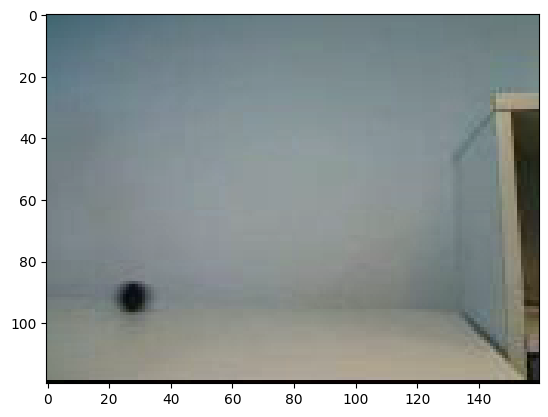

In [258]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from matplotlib import patches


# def condensation_tracker(video_name, params):
'''
video_name - video name
params - parameters
    - draw_plats {0, 1} draw output plots throughout
    - hist_bin   1-255 number of histogram bins for each color: proper values 4,8,16
    - alpha      number in [0,1]; color histogram update parameter (0 = no update)
    - sigma_position   std. dev. of system model position noise
    - sigma_observe    std. dev. of observation model noise
    - num_particles    number of particles
    - model            {0,1} system model (0 = no motion, 1 = constant velocity)
if using model = 1 then the following parameters are used:
    - sigma_velocity   std. dev. of system model velocity noise
    - initial_velocity initial velocity to set particles to
'''
# Choose video
if video_name == "video1.avi":
    first_frame = 10
    last_frame = 42
elif video_name == "video2.avi":
    first_frame = 3
    last_frame = 40
elif video_name == "video3.avi":
    first_frame = 1
    last_frame = 60

# Change this to where your data is
data_dir = './ex6_data/'
video_path = os.path.join(data_dir, video_name)

vidcap = cv2.VideoCapture(video_path)
vidcap.set(1, first_frame)
ret, first_image = vidcap.read()

fig, ax = plt.subplots(1)
image = first_image
frame_height = first_image.shape[0]
frame_width = first_image.shape[1]

first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)
ax.imshow(first_image)

# toggle_selector.RS = RectangleSelector(
#         ax, line_select_callback,
#         useblit=True,
#         button=[1], minspanx=5, minspany=5,
#         spancoords='pixels', interactive=True
#     )
# bbox = plt.connect('key_press_event', toggle_selector)
# key = plt.connect('key_press_event', onkeypress)
# plt.title("Draw a box then press 'q' to continue")
# plt.show()

# selected from the interactive window
# notebook does not have support

top_left = (22, 86) 
bottom_right = (34, 97)

bbox_width = bottom_right[0] - top_left[0]
bbox_height = bottom_right[1] - top_left[1]

# Get initial color histogram
# === implement fuction color_histogram() ===
hist = color_histogram(top_left[0], top_left[1], bottom_right[0], bottom_right[1],
            first_image, params["hist_bin"])
# ===========================================

state_length = 2
if(params["model"] == 1):
    state_length = 4

# a priori mean state
mean_state_a_priori = np.zeros([last_frame - first_frame + 1, state_length])
mean_state_a_posteriori = np.zeros([last_frame - first_frame + 1, state_length])
# bounding box centre
mean_state_a_priori[0, 0:2] = [(top_left[0] + bottom_right[0])/2., (top_left[1] + bottom_right[1])/2.]

if params["model"] == 1:
    # use initial velocity
    mean_state_a_priori[0, 2:4] = params["initial_velocity"]

# Initialize Particles
particles = np.tile(mean_state_a_priori[0], (params["num_particles"], 1))
particles_w = np.ones([params["num_particles"], 1]) * 1./params["num_particles"]

# fig, ax = plt.subplots(1)
# im = ax.imshow(first_image)
# plt.ion()
# plt.figure()

for i in range(last_frame - first_frame + 1):
    t = i + first_frame

    # Propagate particles
    # === Implement function propagate() ===
    particles = propagate(particles, frame_height, frame_width, params)
    # ======================================

    # Estimate
    # === Implement function estimate() ===
    mean_state_a_priori[i, :] = estimate(particles, particles_w)
    # ======================================

    # Get frame
    ret, frame = vidcap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Observe
    # === Implement function observe() ===
    particles_w_1 = observe(particles, frame, bbox_height, bbox_width, params["hist_bin"], hist, params["sigma_observe"])
    # ====================================

    # Update estimation
    mean_state_a_posteriori[i, :] = estimate(particles, particles_w)

    # Update histogram color model                   
    hist_crrent = color_histogram(min(max(0, round(mean_state_a_posteriori[i, 0]-0.5*bbox_width)), frame_width-1),
                                  min(max(0, round(mean_state_a_posteriori[i, 1]-0.5*bbox_height)), frame_height-1),
                                  min(max(0, round(mean_state_a_posteriori[i, 0]+0.5*bbox_width)), frame_width-1),
                                  min(max(0, round(mean_state_a_posteriori[i, 1]+0.5*bbox_height)), frame_height-1),
                                  frame, params["hist_bin"])

    hist = (1 - params["alpha"]) * hist + params["alpha"] * hist_crrent

        

    # RESAMPLE PARTICLES
    # === Implement function resample() ===
    particles, particles_w = resample(particles, particles_w_1)
    # =====================================






In [262]:
particles

array([[ 29.7086065 , 120.        ],
       [ 32.24234924, 120.        ],
       [ 19.32407962, 110.82223281],
       [  7.85324425, 112.60413923],
       [ 36.62043199,  84.91128637],
       [ 16.10416005,  97.55573873],
       [ 43.35447093, 104.37195506],
       [ 44.48130668,  90.86499713],
       [ 45.441261  ,  73.73021037],
       [ 42.85257742,  93.06200802],
       [ 22.58372437,  67.47804599],
       [ 11.58753779,  91.34392012],
       [ 13.50350658,  82.1777012 ],
       [ 20.79858065,  92.21148055],
       [ 38.61337898, 104.57773033],
       [ 63.57176115, 120.        ],
       [ 25.90599888,  60.54923676],
       [ 27.46757679,  93.30986558],
       [ 26.25732108,  73.90832474],
       [ 38.15639101, 114.93161714],
       [ 23.98077641, 106.45931769],
       [ 40.94305134,  88.88338689],
       [  0.        , 115.01688402],
       [ 58.55125639,  86.47163911],
       [ 36.27171172,  91.23648086],
       [  9.17284175,  77.36692531],
       [ 16.55050925,  87.1072236 ],
 

In [267]:
N = particles.shape[0]
particles_w = particles_w.reshape(-1,)

samples = np.random.choice(len(particles_w), N, p=particles_w)
new_particles = particles[samples]
new_particles_w = particles_w[samples]
new_particles_w = new_particles_w/new_particles_w.sum()

In [268]:
new_particles_w

array([0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])

In [265]:
particles_w.shape

(30, 1)

In [260]:
particles_w_1

array([ 0.,  0., nan, nan, nan, nan, nan, nan,  0., nan, nan, nan, nan,
       nan, nan,  0., nan, nan, nan,  0., nan, nan,  0., nan, nan, nan,
       nan, nan,  0.,  0.])

In [259]:
particles_w

array([[0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333],
       [0.03333333]])

In [ ]:
plt.imshow(first_image)
plt.plot(mean_state_a_priori[:,0],mean_state_a_priori[:,1])

In [242]:
mean_state_a_priori

array([[27.07198312, 87.90861023],
       [24.02818234, 84.01960257],
       [26.46522248, 80.23473223],
       [30.02143847, 79.58900422],
       [48.37789687, 82.19940756],
       [51.08918748, 83.14316503],
       [47.00686059, 76.52585579],
       [49.71454654, 63.2613521 ],
       [49.86105714, 58.04525524],
       [55.08719735, 61.59533035],
       [70.37496406, 61.43565673],
       [59.53564675, 56.87791052],
       [58.77783865, 48.99254052],
       [62.73524951, 44.25133642],
       [70.52848494, 44.20747409],
       [65.13542724, 44.65902724],
       [54.99659027, 40.21245789],
       [43.02961398, 40.4866374 ],
       [41.25723281, 37.83920119],
       [41.14838822, 39.22262702],
       [43.1645749 , 25.54358632],
       [41.25946468, 26.40153105],
       [33.80866184, 23.30819187],
       [35.74129438, 26.43663871],
       [38.3261533 , 32.35588907],
       [37.66921171, 39.85509127],
       [37.0419125 , 49.29518443],
       [39.7834138 , 50.39177098],
       [41.03946943,

In [239]:
particles_w.shape

(30, 1)

In [223]:
frame.shape

(120, 160, 3)

In [221]:
particles

array([[ 32.2716242 ,  69.08378078],
       [ 48.11268044,  31.84377179],
       [ 24.26378549,  74.00805086],
       [  0.        ,  84.46147569],
       [ 45.84220859, 120.        ],
       [ 56.36248242,  71.32714529],
       [ 38.70271401,  63.24808131],
       [  0.        , 103.06795372],
       [ 56.87543794,   0.        ],
       [ 48.04391014, 101.90342075],
       [ 86.6579207 ,  89.96975745],
       [  8.3140912 , 116.18793042],
       [ 17.49861293,  96.26118624],
       [  0.        ,  99.53601707],
       [  7.27347006,  95.0937164 ],
       [119.72200955,  98.15505013],
       [130.10022754,  82.76162041],
       [  0.        ,  89.3224205 ],
       [  8.88702194,  84.51167421],
       [ 60.34763909,  48.20113037],
       [ 11.23289092, 120.        ],
       [  0.        ,  80.85352446],
       [  7.41477901,  83.70554733],
       [ 44.85626919,  80.25342847],
       [ 81.78013546,  71.56880766],
       [ 26.1447636 ,  91.74368349],
       [ 49.18156473, 103.68718745],
 

In [219]:
particles_w_1

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [232]:
mean_state_a_posteriori

array([[23.09134663, 92.37107282],
       [21.79027716, 86.39461829],
       [21.45157992, 77.795417  ],
       [19.21261225, 65.07502663],
       [17.5572032 , 70.04191716],
       [21.20876859, 71.48500801],
       [28.1769551 , 73.68619734],
       [27.60765244, 68.21486469],
       [28.2378663 , 50.51410437],
       [25.70306158, 43.22612978],
       [31.24825976, 21.77016597],
       [33.56496749, 31.3476835 ],
       [30.73561675, 30.05200445],
       [29.73308117, 38.21218116],
       [21.87000914, 48.346287  ],
       [31.47578424, 52.63676202],
       [34.17297091, 51.42152233],
       [42.53486636, 52.14460651],
       [51.43301185, 51.19141961],
       [48.85814079, 54.57827722],
       [47.12634083, 57.16143457],
       [48.33060245, 48.84628316],
       [37.65895472, 39.7039435 ],
       [43.61895923, 48.973612  ],
       [41.88269738, 53.30478479],
       [53.2382816 , 50.19513197],
       [65.38701309, 49.18330521],
       [53.67526551, 50.87742539],
       [54.91505644,

In [214]:
estimate(particles, particles_w)

array([nan, nan])

In [215]:
particles

array([[  8.05828296, 120.        ],
       [  0.56331068,  83.94785802],
       [143.39383173,  88.54719253],
       [ 65.95901072, 120.        ],
       [131.71162323,  82.26028301],
       [  2.14118088,  37.05124006],
       [ 40.48215342,  94.82913624],
       [ 29.69202015,  90.84816195],
       [  0.        , 110.40072026],
       [  8.63393391,  64.99207831],
       [  0.        ,  83.86948764],
       [107.69107465, 109.53537945],
       [ 52.69902688,  82.39119497],
       [ 99.84564   ,  90.36582378],
       [ 47.920667  ,  76.52861268],
       [ 37.37073903, 106.57630711],
       [ 79.19497922, 110.62178759],
       [113.52763769,  57.19418095],
       [  8.49829063,  50.63640836],
       [ 64.81395023,  85.6594198 ],
       [ 49.74515693, 106.49485805],
       [  0.        , 108.30502231],
       [ 14.33598328,  97.62525103],
       [  3.746802  , 110.01229472],
       [ 13.05292008,  91.18322398],
       [ 41.04627454,  66.23432383],
       [  0.        , 120.        ],
 

In [216]:
particles_w

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

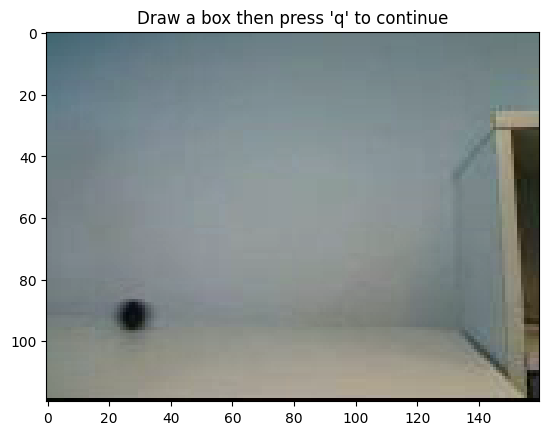

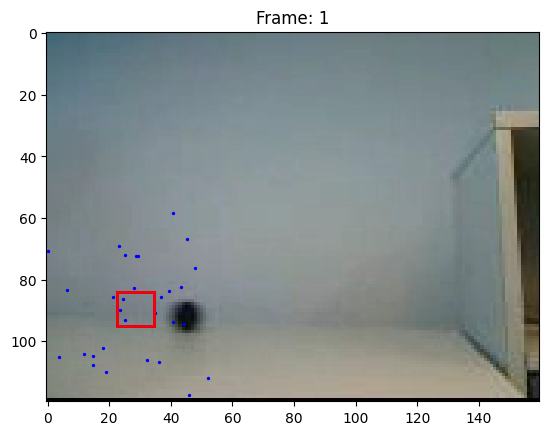

/Users/alpayozkan/opt/anaconda3/envs/ex4/lib/python3.10/site-packages/numpy/lib/histograms.py:1067: RuntimeWarning: invalid value encountered in divide
  hist /= s


ValueError: cannot convert float NaN to integer

In [210]:
# if __name__ == "__main__":
video_name = 'video3.avi'
params = {
    "draw_plots": 1,
    "hist_bin": 16,
    "alpha": 0,
    "sigma_observe": 0.1,
    "model": 0,
    "num_particles": 30,
    "sigma_position": 15,
    "sigma_velocity": 1,
    "initial_velocity": (1, 10)
}
condensation_tracker(video_name, params)

In [226]:
mean_state_a_posteriori

array([[23.09134663, 92.37107282],
       [21.79027716, 86.39461829],
       [21.45157992, 77.795417  ],
       [19.21261225, 65.07502663],
       [17.5572032 , 70.04191716],
       [21.20876859, 71.48500801],
       [28.1769551 , 73.68619734],
       [27.60765244, 68.21486469],
       [28.2378663 , 50.51410437],
       [25.70306158, 43.22612978],
       [31.24825976, 21.77016597],
       [33.56496749, 31.3476835 ],
       [30.73561675, 30.05200445],
       [29.73308117, 38.21218116],
       [21.87000914, 48.346287  ],
       [31.47578424, 52.63676202],
       [34.17297091, 51.42152233],
       [42.53486636, 52.14460651],
       [51.43301185, 51.19141961],
       [48.85814079, 54.57827722],
       [47.12634083, 57.16143457],
       [48.33060245, 48.84628316],
       [37.65895472, 39.7039435 ],
       [43.61895923, 48.973612  ],
       [41.88269738, 53.30478479],
       [53.2382816 , 50.19513197],
       [65.38701309, 49.18330521],
       [53.67526551, 50.87742539],
       [54.91505644,

In [228]:
a=np.random.normal(0,1,(30,2))

In [231]:
np.concatenate([a,a], axis=1).shape

(30, 4)